## K-Means
Clustering of Football Clubs: You are given a dataset containing football player information. The objective is to cluster different football clubs based on various attributes.

Your initial step should be extracting the club information from the player dataset. It will involve computing the “average player” of each club. One way is to group the dataset by “club name id” and calculate the mean values for all relevant features. You are encouraged to explore different ideas.

Now, use K-Means to cluster the football clubs. You can determine the criteria for clustering by considering various features. For example - First try clustering using all features, after that try again using only features representing player stats or financial attributes.

To find the optimal number of clusters, K, you can use the elbow method.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("football.csv")
df.head()

,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_jersey_number,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
0,158023,L. Messi,93,93,78000000.0,320000.0,34,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,30.0,10.0,Left,4,4,5,Medium/Low,Unique,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,1
1,188545,R. Lewandowski,92,92,119500000.0,270000.0,32,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,9.0,9.0,Right,4,4,5,High/Medium,Unique,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,1
2,20801,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,187,83,11.0,Manchester United,English Premier League,1.0,7.0,7.0,Right,4,5,5,High/Low,Unique,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,1
3,190871,Neymar Jr,91,91,129000000.0,270000.0,29,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,10.0,NaN,Right,5,5,5,High/Medium,Unique,238700000.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...","Injury Prone, Flair, Speed Dribbler (AI), Play...",91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN,1
4,192985,K. De Bruyne,91,91,125500000.0,350000.0,30,181,70,10.0,Manchester City,English Premier League,1.0,17.0,7.0,Right,5,4,4,High/High,Unique,232200000.0,"#Dribbler, #Playmaker, #Engine, #Distance Shoo...","Injury Prone, Leadership, Early Crosser, Long ...",76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN,1


In [53]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
print(df.isna().sum())

sofifa_id                         0
short_name                        0
overall                           0
potential                         0
value_eur                        66
wage_eur                         61
age                               0
height_cm                         0
weight_kg                         0
club_team_id                     61
club_name                        61
league_name                      61
league_level                     61
club_jersey_number               61
nation_jersey_number           7239
preferred_foot                    0
weak_foot                         0
skill_moves                       0
international_reputation          0
work_rate                         0
body_type                         0
release_clause_eur              466
player_tags                    6900
player_traits                  2901
pace                            709
shooting                        709
passing                         709
dribbling                   

In [55]:
df.index[df["value_eur"].isna()] #displays which values are null in value_eur

Int64Index([ 124,  319,  512,  670,  806,  809,  830,  868,  874, 1005, 1184,
            1421, 1548, 1598, 1647, 1653, 1813, 1848, 1989, 2040, 2096, 2334,
            2389, 2422, 2704, 2734, 2906, 3097, 3166, 3289, 3332, 3355, 3380,
            3432, 3522, 3707, 3791, 3878, 4052, 4125, 4228, 4353, 4355, 4360,
            4363, 4401, 4478, 5040, 5206, 5476, 5723, 5756, 5791, 5845, 5933,
            5993, 6060, 6268, 6333, 6344, 6345, 6451, 6696, 7076, 7155, 7214],
           dtype='int64')

In [56]:
columns_to_check = ["wage_eur", "value_eur", "club_team_id", "club_name", "league_name", "league_level", "club_jersey_number"]
df.dropna(subset=columns_to_check, inplace=True)
columns_to_drop = ["player_tags", "player_traits", "goalkeeping_speed", "nation_jersey_number"]
df.drop(columns=columns_to_drop, inplace=True)



In [57]:
# List of columns to fill null values with median
columns_to_fill = ["pace", "shooting", "passing", "dribbling", "defending", "physic", "release_clause_eur"]

# Fill null values in specified columns with median
for column in columns_to_fill:
    df[column].fillna(df[column].median(), inplace=True)


In [58]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df["preferred_foot"]= label_encoder.fit_transform(df["preferred_foot"])

df["preferred_foot"].unique()

array([0, 1])

In [59]:
df["work_rate"]= label_encoder.fit_transform(df["work_rate"])
df["body_type"]= label_encoder.fit_transform(df["body_type"])

In [60]:
df = df.loc[:, ['sofifa_id', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_team_id',
       'league_level', 'club_jersey_number',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type',
       'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'contribution_type']]

In [61]:
features = ["overall", "potential", "wage_eur", "value_eur", "age","club_team_id"]
data = df[features].copy()
data.head()

In [63]:
club_id_column = data['club_team_id']
data = data.drop(columns='club_team_id', axis=1)
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1
data['club_team_id'] = club_id_column


In [64]:
data.head()

,overall,potential,wage_eur,value_eur,age,club_team_id
0,11.000000,10.523810,10.141631,5.019848,7.538462,73.0
1,10.777778,10.285714,8.711016,7.159299,6.769231,21.0
2,10.555556,10.047619,8.711016,3.318598,8.307692,11.0
3,10.555556,10.047619,8.711016,7.649053,5.615385,73.0
4,10.555556,10.047619,11.000000,7.468617,6.000000,10.0


In [65]:
club_stats = data.groupby('club_team_id').mean()

In [66]:
#2)Initialize random centroids
def random_centroids(club_stats, k):
    centroids = []
    for i in range(k):
        centroid = club_stats.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)


In [67]:
#3)Get labels for each data point
def get_labels(club_stats, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((club_stats - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [68]:
#4)labels.value_counts()
def new_centroids(club_stats, labels, k):
    centroids = club_stats.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids


In [69]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [70]:
#5)Plot the centroids
def plot_clusters(club_stats, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(club_stats)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

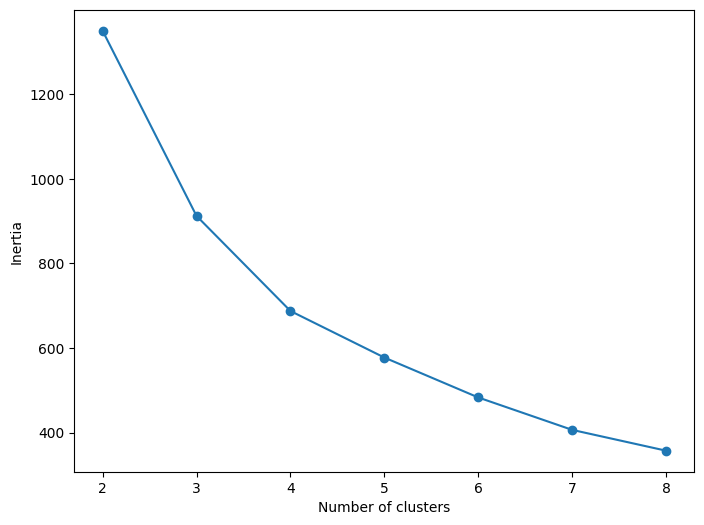

In [71]:
#Find the optimal k
from sklearn.cluster import KMeans
candidate_clusters=[2,3,4,5,6,7,8]
inertia_scores=[]
for cluster in candidate_clusters:
    kmeans=KMeans(cluster,n_init=10)
    kmeans.fit(club_stats)
    inertia_scores.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(candidate_clusters,inertia_scores,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

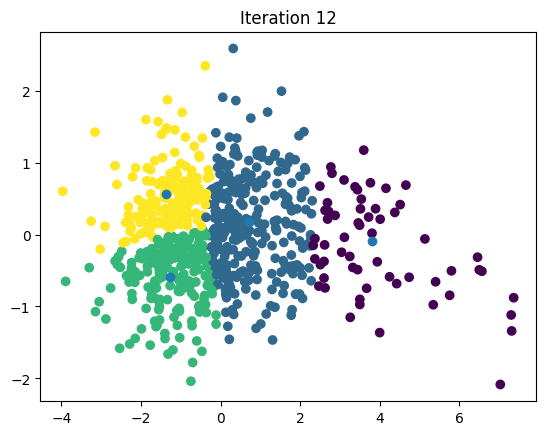

In [74]:
max_iterations = 100
#4 is the optimal k chosen using elbow method
centroid_count = 4

centroids = random_centroids(club_stats, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(club_stats, centroids)
    centroids = new_centroids(club_stats, labels, centroid_count)
    plot_clusters(club_stats, labels, centroids, iteration)
    iteration += 1